# AccelerateAI - Data Science Global Bootcamp

### Stepwise Regression - For Variable Selection

Stepwise Regression is a method for predictor selection for the purpose of fitting a regression model.
<br>
In stepwise regression, variables are recursively added to or removed from the regression equation one by one till there is no more significant improvement in the predictability of the model.<br>
There are three ways to do Stepwise Regression:
1. Forward Selection - Predictors are recursively added to the regression equation till model converges
2. Backward Elemination - Predictors are recursively removed from the equation containing all predictors
3. Bidirectional Elemination - Predictors are added as well as removed iteratively

In this notebook we will impliment one of three types of stepwise regression models.

<b>Warning</b> : Although useful in identifying the best predictors which explain the target variable, Stepwise regression is not without its set of controversies and should not be applied blindly to any problem. <br>
For details please read : https://towardsdatascience.com/stopping-stepwise-why-stepwise-selection-is-bad-and-what-you-should-use-instead-90818b3f52df


### 50 StartUp Dataset 
This is a dataset for 50 startups and their financial metrics. 

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
df = pd.read_csv('50_Startups_data.csv')
# first five entries of the dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,153441.51,101145.55,407934.5400,Florida,221050.39
1,142107.34,91391.77,366168.4200,Florida,196187.94
2,165349.20,136897.80,444985.8024,New York,192261.83
3,162597.70,151377.59,443898.5300,California,191792.06
4,130298.13,145530.06,323876.6800,Florida,185752.60


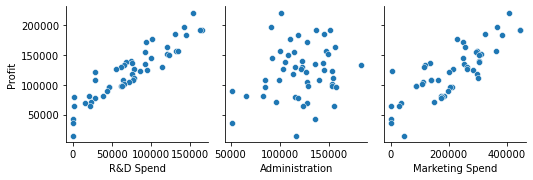

In [3]:
# Lets look at relationship of Profit with the numerical predictors
sns.pairplot(df,     
             x_vars=['R&D Spend', 'Administration', 'Marketing Spend'],
             y_vars=['Profit'])

<AxesSubplot:xlabel='State', ylabel='Profit'>

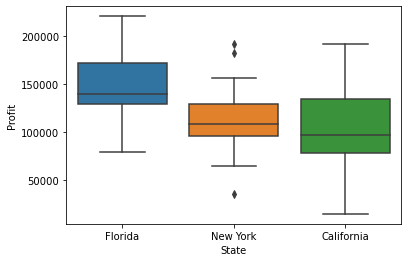

In [4]:
# How does the Profit vary in different States
sns.boxplot(y="Profit", x="State", data=df)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

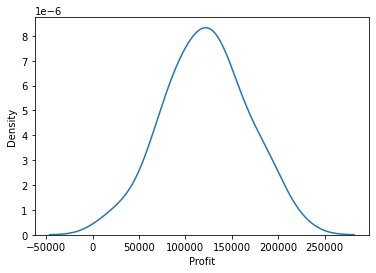

In [5]:
# Distribution of Profit
sns.kdeplot(x=df.Profit)

In [6]:
# split the dataframe into dependent and independent variables.
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,153441.51,101145.55,407934.5400,Florida
1,142107.34,91391.77,366168.4200,Florida
2,165349.20,136897.80,444985.8024,New York
3,162597.70,151377.59,443898.5300,California
4,130298.13,145530.06,323876.6800,Florida


In [7]:
y.head()

0    221050.39
1    196187.94
2    192261.83
3    191792.06
4    185752.60
Name: Profit, dtype: float64

In [8]:
# since the state is a string datatype column we need to encode it.
x = pd.get_dummies(x,drop_first=True)
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,153441.51,101145.55,407934.5400,1,0
1,142107.34,91391.77,366168.4200,1,0
2,165349.20,136897.80,444985.8024,0,1
3,162597.70,151377.59,443898.5300,0,0
4,130298.13,145530.06,323876.6800,1,0


In [9]:
x.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

In [10]:
# add a column of ones as integer data type
x = sm.add_constant(x)
# choose a Significance level usually 0.05, if p>0.05
# for the highest values parameter, remove that value
x_opt = x
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.12e-29
Time:                        15:46:08   Log-Likelihood:                -524.58
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      44   BIC:                             1073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.756e+04   7106.983      6.692      0.000    3.32e+04    6.19e+04
R&D Spend           0.7653      0.057     13.536      0.000       0.651       0.879
Administration     -0.0126      0.053     -0.238      0.813      -0.119       0.094
Marketing Spend     0.0429      0.021      1.998      0.052      -0.000       0.086
State_Florida    3.061e+04   3279.190      9.333      0.000     2.4e+04    3.72e+04
State_New York   1259.4824   3269.603      0.385      0.702   -5329.970    7848.934
==============================================================================
Omnibus:                       15.599   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.211
Skew:                          -0.985   Prob(JB):                     9.12e-06
Kurtosis:                       5.694   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Forward Selection

In [11]:
x.head() # Dataframe containing Predictors and constant

,const,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.0,153441.51,101145.55,407934.5400,1,0
1,1.0,142107.34,91391.77,366168.4200,1,0
2,1.0,165349.20,136897.80,444985.8024,0,1
3,1.0,162597.70,151377.59,443898.5300,0,0
4,1.0,130298.13,145530.06,323876.6800,1,0


In [12]:
y.head() # Series containing target variable 

0    221050.39
1    196187.94
2    192261.83
3    191792.06
4    185752.60
Name: Profit, dtype: float64

In [13]:
# choose a Significance level of .05 and select the predictor with lowest p value - provided its p value is less than .05

x_opt = x # initializing the dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in x:
    x_opt=x[i]
    results = sm.OLS(y,x_opt).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues)))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for const is 1.1147452104978925e-24
adj R Sq. is 1.1102230246251565e-16
----------------------------------------------
extracted pvalue for R&D Spend is 5.3393314812684876e-30
adj R Sq. is 0.9288868632033576
----------------------------------------------
extracted pvalue for Administration is 3.967418064879962e-23
adj R Sq. is 0.8645420599566076
----------------------------------------------
extracted pvalue for Marketing Spend is 7.33597664780061e-28
adj R Sq. is 0.9130896495440518
----------------------------------------------
extracted pvalue for State_Florida is 2.2997672113948263e-07
adj R Sq. is 0.4121749277786
----------------------------------------------
extracted pvalue for State_New York is 0.00011778052071553875
adj R Sq. is 0.24830954721373932
----------------------------------------------


In [14]:
pvalue_df = pvalue_df[pvalue_df["Predictor"].str.contains("const") == False]

In [15]:
pvalue_df.sort_values('pvalue',inplace=True)

In [16]:
pvalue_df

,Predictor,pvalue
0,R&D Spend,5.339331e-30
0,Marketing Spend,7.335977e-28
0,Administration,3.967418e-23
0,State_Florida,2.299767e-07
0,State_New York,1.177805e-04


In [17]:
# Extract the name of the variable having lowest pvalue and push it into a list 
a = list(pvalue_df["Predictor"])
b = [a.pop(0)]

In [18]:
b  # list containing name of the selected variable in first iteration

['R&D Spend']

In [19]:
a # list containing names of the trial variables

['Marketing Spend', 'Administration', 'State_Florida', 'State_New York']

In [20]:
# Now we select the variable containing lowest p value and add variavles one at a time iterativelty to check in which
# combination we get the new variable with lowest p value.

x_sel=x[b] #dataframe containing selected variable(s)
x_opt=x[a] #dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[2])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[2])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for Marketing Spend is 0.02272290597857474
extracted pvalue for R&D Spend is 2.095474647468626e-10
adj R Sq. is 0.8571765545674251
----------------------------------------------
extracted pvalue for Administration is 0.5121114153310937
extracted pvalue for R&D Spend is 1.645683981850738e-20
adj R Sq. is 0.8417851645227038
----------------------------------------------
extracted pvalue for State_Florida is 2.872386305730807e-14
extracted pvalue for R&D Spend is 1.9446734772995177e-31
adj R Sq. is 0.9538826483868297
----------------------------------------------
extracted pvalue for State_New York is 0.002580118851408412
extracted pvalue for R&D Spend is 1.3210925621291433e-22
adj R Sq. is 0.8686442079738934
----------------------------------------------


In [21]:
pvalue_df.sort_values('pvalue',inplace=True)

In [22]:
pvalue_df

,Predictor,pvalue
0,State_Florida,2.872386e-14
0,State_New York,2.580119e-03
0,Marketing Spend,2.272291e-02
0,Administration,5.121114e-01


In [23]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [24]:
b

['R&D Spend', 'State_Florida']

In [25]:
a

['State_New York', 'Marketing Spend', 'Administration']

In [26]:
x_sel=x[b]
x_opt=x[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[3])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[3])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for State_New York is 0.9977006108844558
extracted pvalue for R&D Spend is 1.078480401683906e-30
extracted pvalue for State_Florida is 5.033660787665375e-12
adj R Sq. is 0.9528801058650875
----------------------------------------------
extracted pvalue for Marketing Spend is 0.02826112621491504
extracted pvalue for R&D Spend is 4.343539069397671e-20
extracted pvalue for State_Florida is 6.184998504565829e-14
adj R Sq. is 0.9576083089469584
----------------------------------------------
extracted pvalue for Administration is 0.29613531437881835
extracted pvalue for R&D Spend is 1.2565997768907266e-30
extracted pvalue for State_Florida is 3.836884857588801e-14
adj R Sq. is 0.9539969332273193
----------------------------------------------


In [27]:
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,Marketing Spend,0.028261
0,Administration,0.296135
0,State_New York,0.997701


In [28]:
a=list(pvalue_df["Predictor"])
b=b+[a.pop(0)]

In [29]:
b

['R&D Spend', 'State_Florida', 'Marketing Spend']

In [30]:
a

['Administration', 'State_New York']

In [31]:
x_sel=x[b]
x_opt=x[a]
pvalue_df = pd.DataFrame()

for i in x_opt:
    x_vars=pd.concat([x_sel,x_opt[i]], join = 'outer', axis = 1)
    x_vars=sm.add_constant(x_vars)
    results = sm.OLS(y,x_vars).fit()
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues[4])]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues[4])))
    print("extracted pvalue for",b[0],"is",float(results.pvalues[1]))
    print("extracted pvalue for",b[1],"is",float(results.pvalues[2]))
    print("extracted pvalue for",b[2],"is",float(results.pvalues[3]))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')
    #print(results.summary())
    #print(results.pvalues)

extracted pvalue for Administration is 0.7840470304402598
extracted pvalue for R&D Spend is 3.919476306002647e-18
extracted pvalue for State_Florida is 1.1349121933999249e-13
extracted pvalue for Marketing Spend is 0.05396600851380457
adj R Sq. is 0.9567393394536166
----------------------------------------------
extracted pvalue for State_New York is 0.6821410973272577
extracted pvalue for R&D Spend is 2.9043372865652533e-19
extracted pvalue for State_Florida is 3.1535462578644987e-12
extracted pvalue for Marketing Spend is 0.027262951657778048
adj R Sq. is 0.9568292829007695
----------------------------------------------


In [32]:
pvalue_df.sort_values('pvalue',inplace=True)
pvalue_df

,Predictor,pvalue
0,State_New York,0.682141
0,Administration,0.784047


In [33]:
b

['R&D Spend', 'State_Florida', 'Marketing Spend']

### Using MLXTEND feature selection method

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston, load_diabetes

import matplotlib.pyplot as plt

In [47]:
#boston = load_boston()
X, y = load_diabetes(return_X_y=True, as_frame=True)
lr = LinearRegression()

In [48]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [49]:
sfs_forward = sfs(lr,
            k_features=5,
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)

sfs = sfs_forward.fit(X, y)

In [39]:
print('Best subset:', sfs.k_feature_names_)

Best subset: ('sex', 'bmi', 'bp', 's3', 's5')


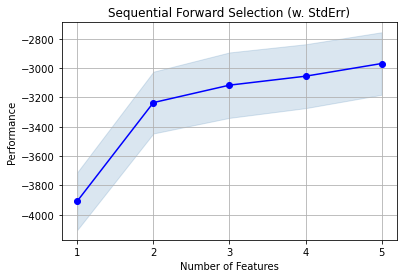

In [40]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_back = sfs(lr,
            k_features=5,
            forward=False,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)

sfs = sfs_back.fit(X, y)
print('Best subset:', sfs.k_feature_names_)

Best subset: ('sex', 'bmi', 'bp', 's1', 's5')


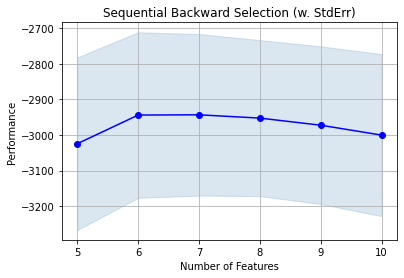

In [53]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

***